In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# add the parent dir of notebooks to path
sys.path.append(os.path.dirname(os.path.abspath('')))

OUTPUT_DIRECTORY = os.path.join(os.path.abspath(''), "02_Sample_Dataset_Figures_output")
os.makedirs(OUTPUT_DIRECTORY, exist_ok=True)

from data.nab.real_tweets import nab_multivariate_tweet_volume, STOCK_NAMES
tweet_df = nab_multivariate_tweet_volume(labels="points")

from data.yahoo.a1_benchmark import yahoo_a1_benchmark
yahoo_df = yahoo_a1_benchmark(clean_series=False)

FIGURE_SIZE = (15,5)

# Sample Dataset Visualisation (selective)

This notebook aims to create figures of useful data to show in the final report.

# NAB Tweets

In [2]:
def plot_time_series_nab_tweets(dat, stock, s_power=5, point_ticks=True, num_ticks=4, annotate=True):
    plt.ion()
    fig, ax = plt.subplots(1, 1, figsize=FIGURE_SIZE, dpi=300)

    def color_map(value):
        if value is True:
            return (1,0,0)
        else:
            return (0,0,1)

#     ax.title.set_text(stock)
    ax.scatter(dat.index, dat[f"value_{stock}"], c=dat[f"anomaly_{stock}"].apply(color_map), s=(dat[f"anomaly_{stock}"].astype(int) + 1)**s_power, marker="o")
    ax.fill_between(dat.index, 0, 1, where=dat[f"anomaly_{stock}"], color="red", alpha=0.5, transform=ax.get_xaxis_transform())
    
    xticks = list(dat.index[list(np.round(np.linspace(0, len(dat)-1, num=num_ticks)).astype(int))])
    if point_ticks:
        other_ticks = dat.index[dat[f"anomaly_{stock}"] == True]
        xticks.extend(list(other_ticks))

    ax.set_xticks(xticks)
    ax.set_ylabel("No. of tweets", fontsize=20)
    ax.set_xlabel("Timestep", fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    
    if annotate:
        for point in dat.index[dat[f"anomaly_{stock}"] == True]:
            ax.annotate("Anomaly", 
                        xy=(point, dat[f"value_{stock}"].loc[point]),
                        xytext=(30, 0),
                        textcoords='offset points',
                        arrowprops=dict(arrowstyle="->",color="red"),
                        annotation_clip=True,
                        color="red",
            )

    plt.draw()
    plt.savefig(f"{OUTPUT_DIRECTORY}/nab_tweets_{stock}.png")


## Point anomaly example - FB (Facebook)

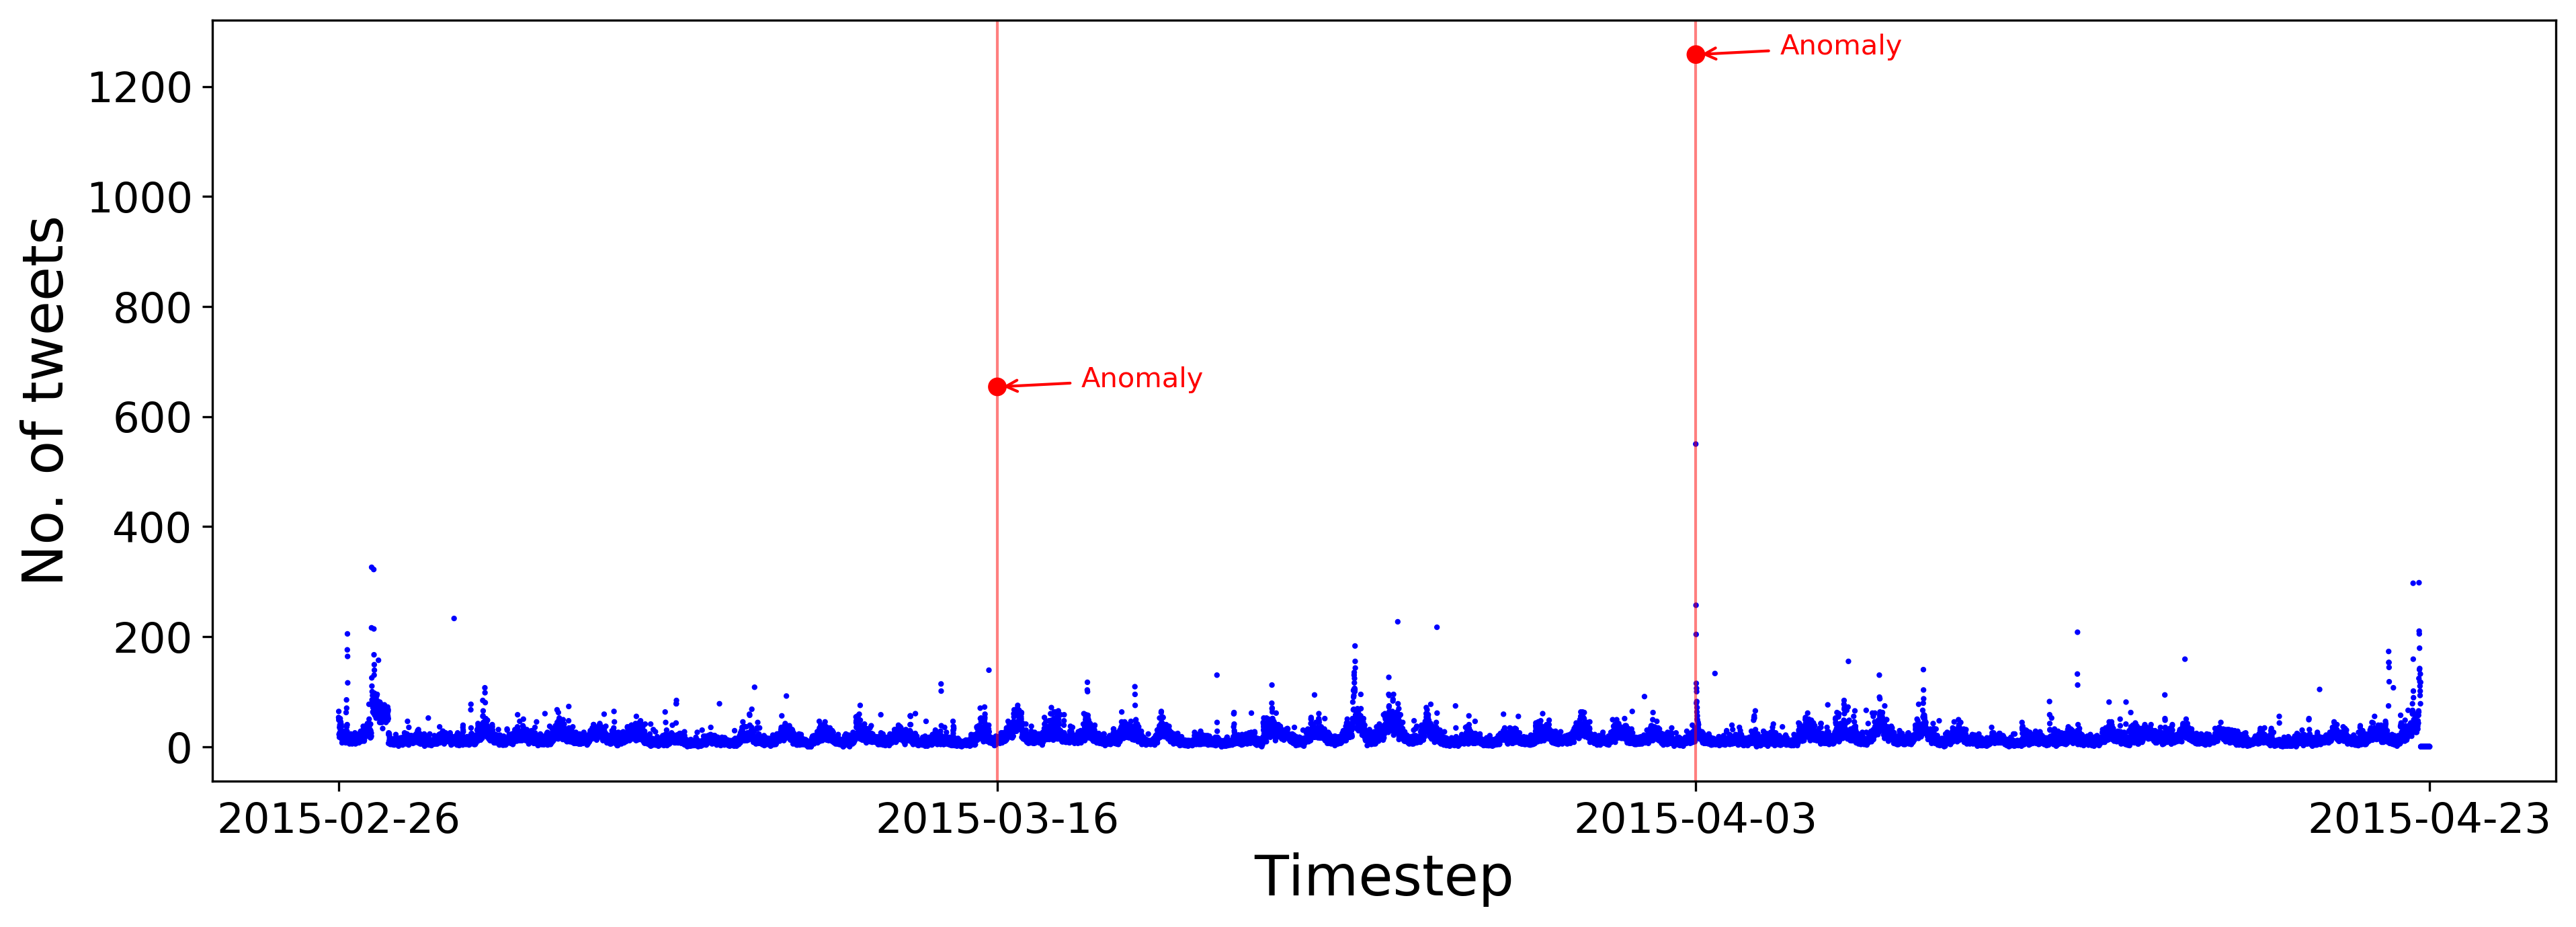

In [3]:
plot_time_series_nab_tweets(tweet_df, "FB", point_ticks=True, num_ticks=2)

## Contextual anomaly example - UPS

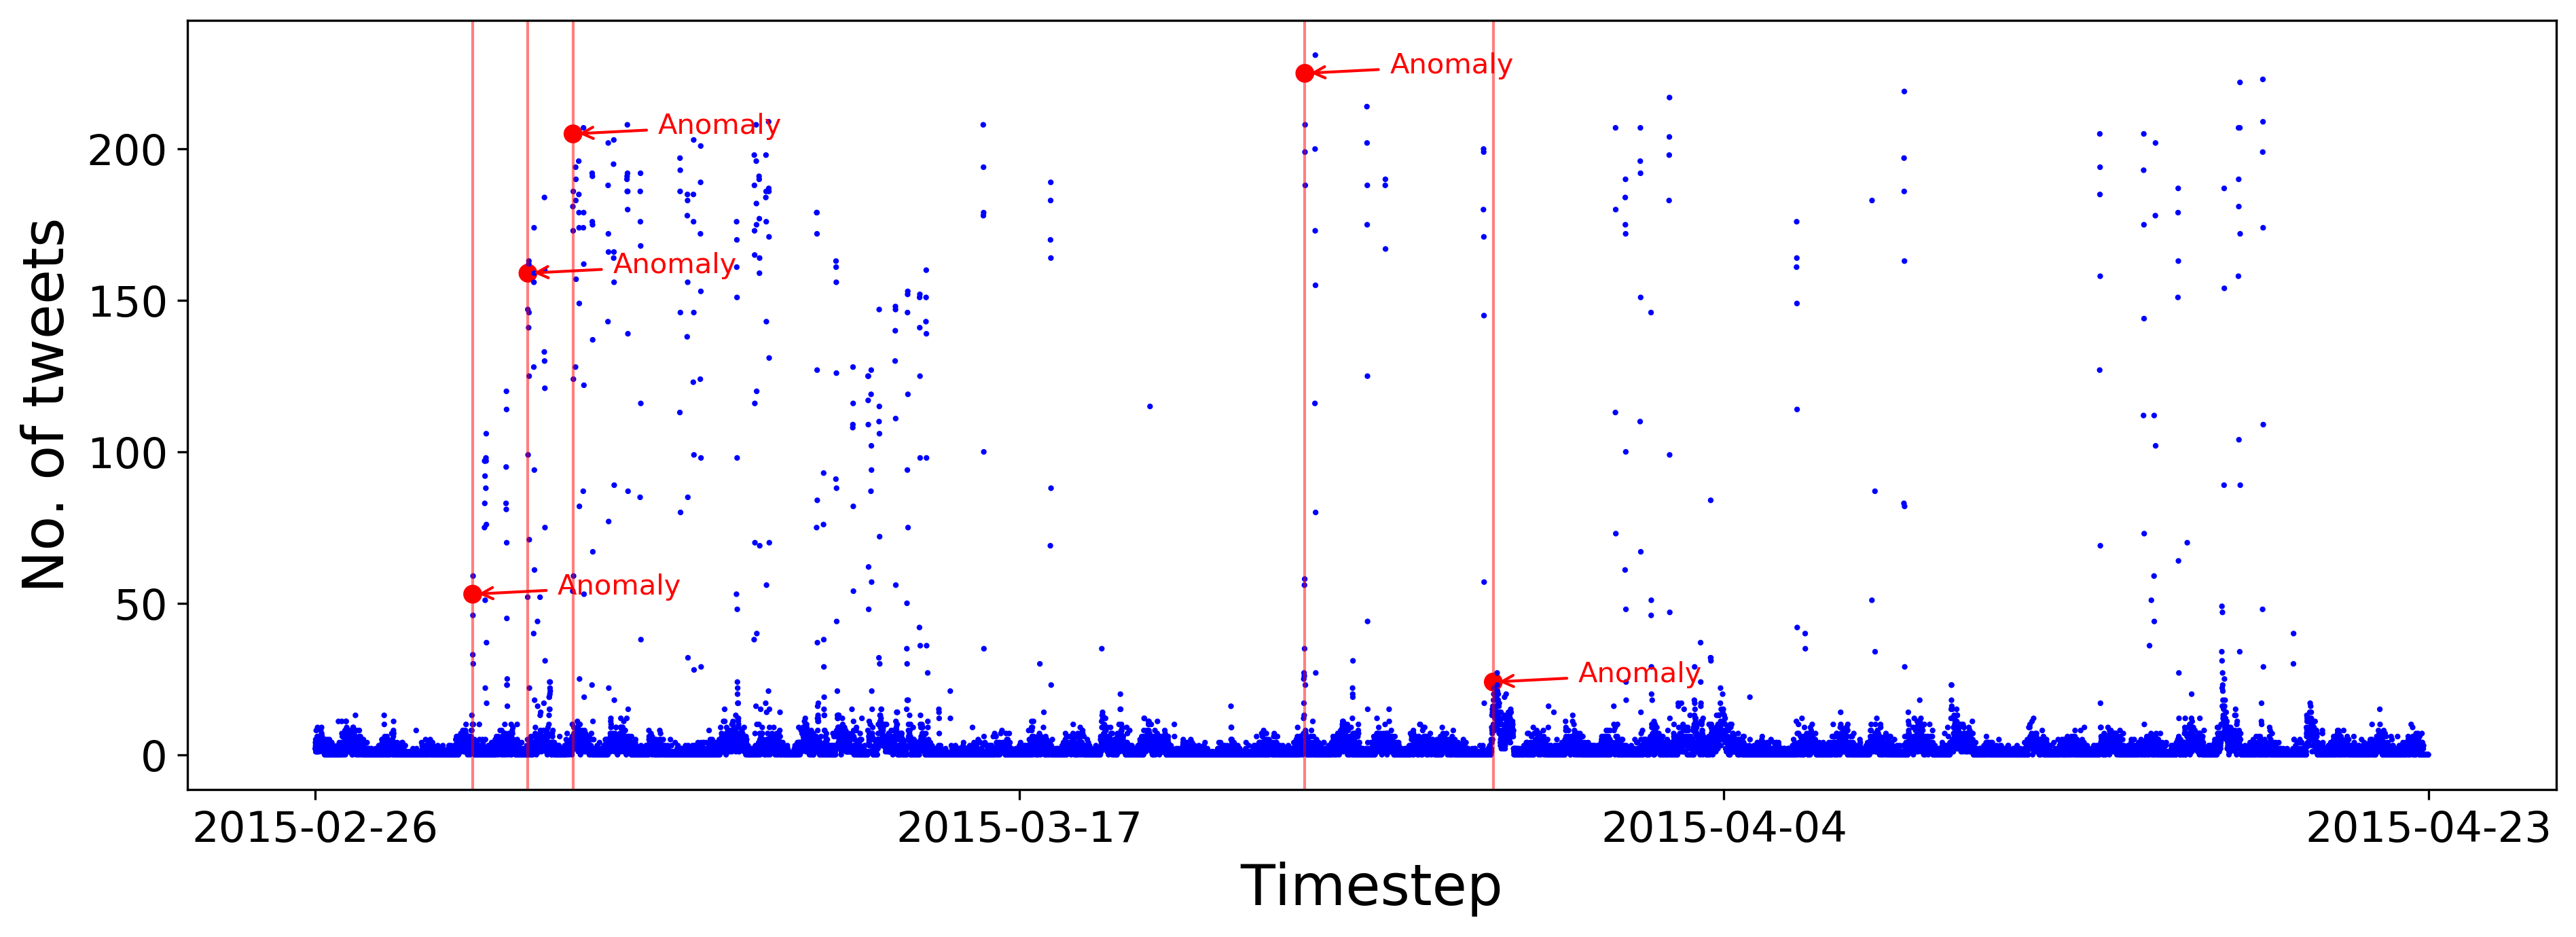

In [4]:
plot_time_series_nab_tweets(tweet_df, "UPS", point_ticks=False, num_ticks=4)

Interesting things to note:

1. The first three anomalies are higher-highs. The pattern continues and is considered normal after some period of time.
2. The same thing occurs with anomaly no4 and the spike after it.
3. By this logic, anomaly 5 should probably not be labelled as such, but the baseline level is significantly different - example of heteroskedasticity.

---

# Yahoo A1

In [5]:
def plot_time_series_yahoo_a1(dat, num, s_power=5, annotate=True, extra_plot=None):
    plt.ion()
    fig, ax = plt.subplots(1, 1, figsize=FIGURE_SIZE, dpi=300)

    def color_map(value):
        if value is True:
            return (1,0,0)
        else:
            return (0,0,1)

#     ax.title.set_text(f"Series {num}")
    ax.scatter(dat.index, dat[f"value_{num}"], c=dat[f"anomaly_{num}"].apply(color_map), s=(dat[f"anomaly_{num}"].astype(int) + 1)**s_power, marker="o")
    ax.fill_between(dat.index, 0, 1, where=dat[f"anomaly_{num}"], color="red", alpha=0.2, transform=ax.get_xaxis_transform())
#     ax.set_xticks([])
    ax.set_xlabel("Timestep", fontsize=20)
    ax.set_ylabel("Value", fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    
    
    if annotate:
        for point in dat.index[dat[f"anomaly_{num}"] == True]:
            ax.annotate("Anomaly", 
                        xy=(point, dat[f"value_{num}"].loc[point]),
                        xytext=(30, 0),
                        textcoords='offset points',
                        arrowprops=dict(arrowstyle="->",color="red"),
                        annotation_clip=True,
                        color="red",
            )
    
    if extra_plot:
        extra_plot(dat, ax)
            
    
    plt.draw()
    plt.savefig(f"{OUTPUT_DIRECTORY}/yahoo_a1_series_{num}.png")


## Group/collective anomaly

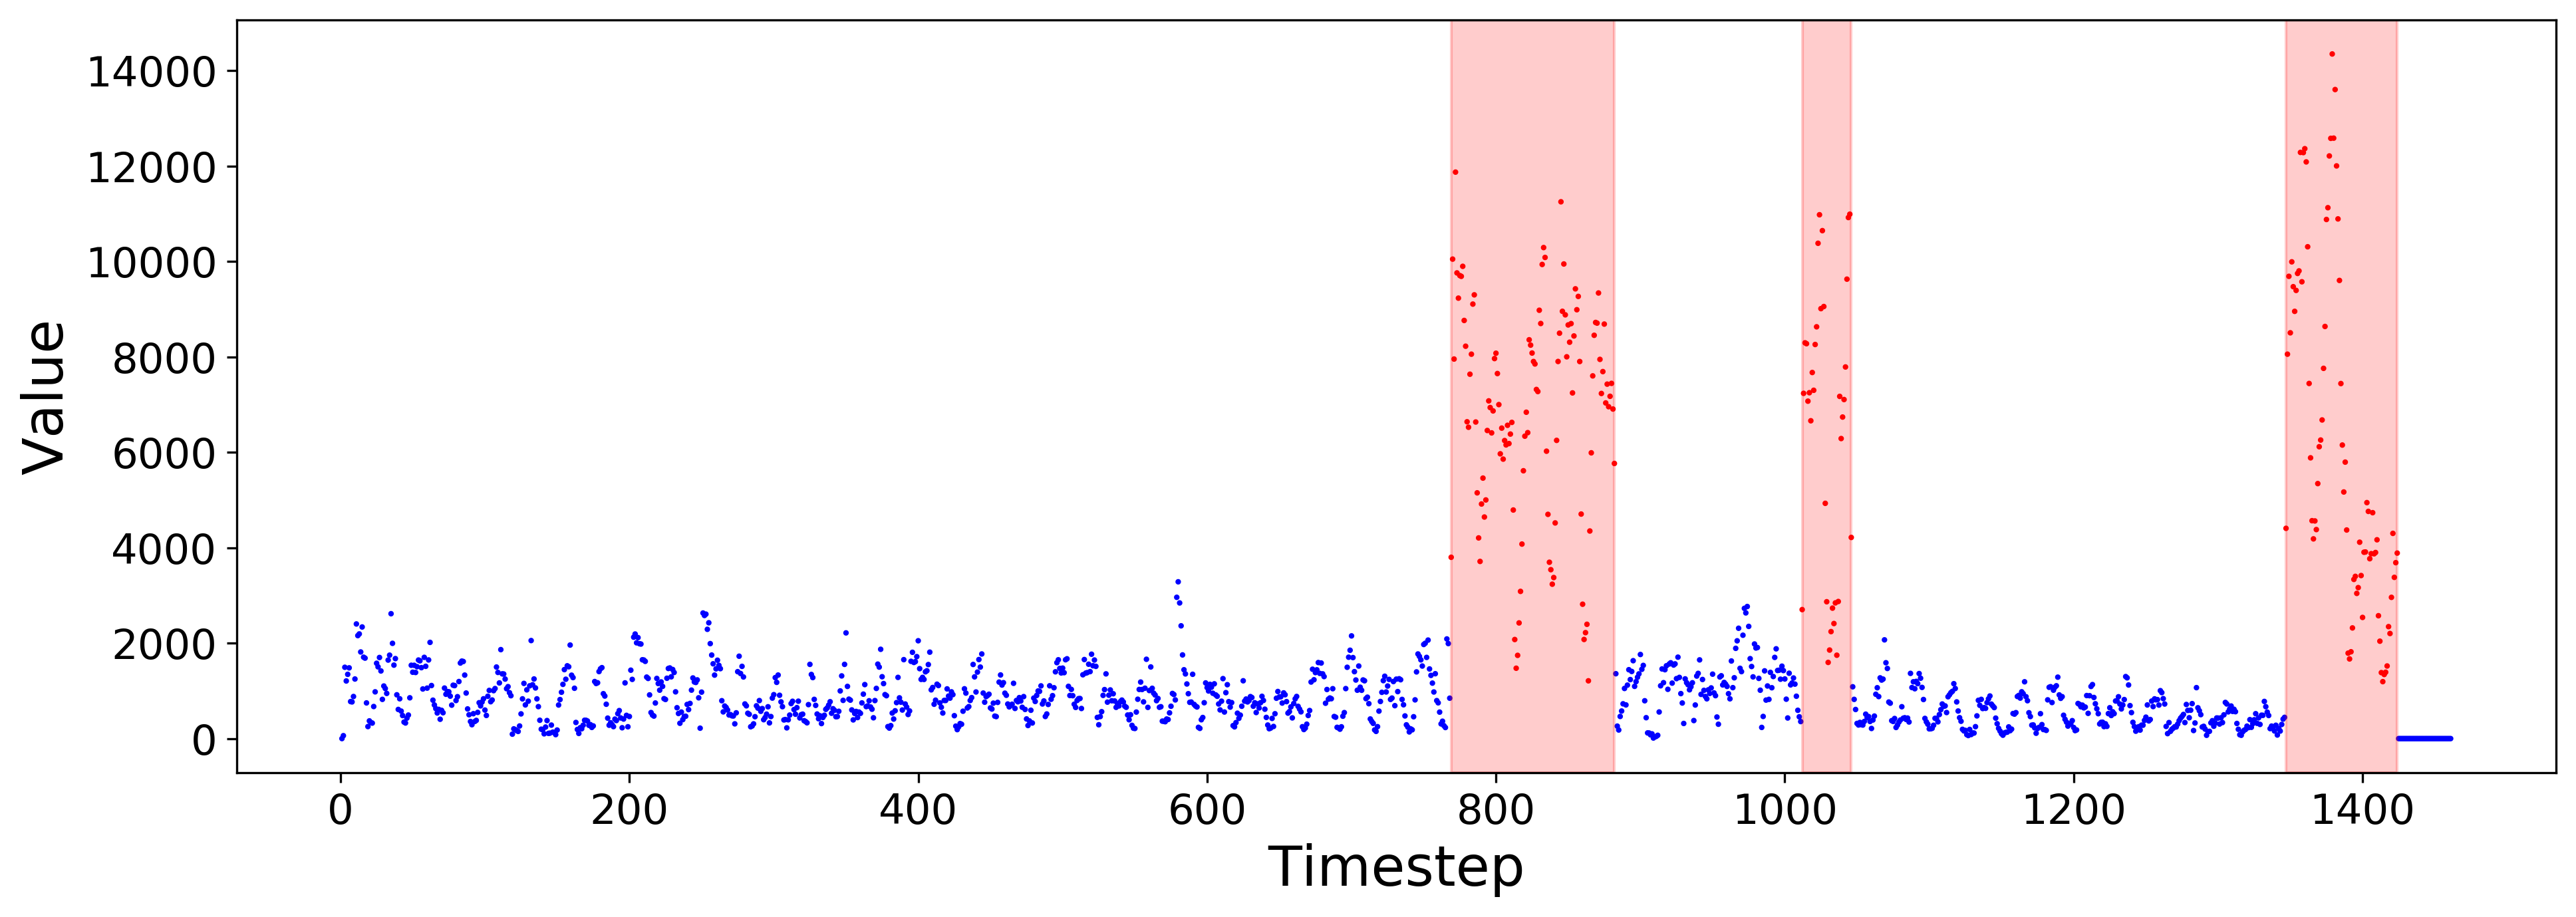

In [6]:
plot_time_series_yahoo_a1(yahoo_df, 17, s_power=0, annotate=False)

## Contextual anomaly

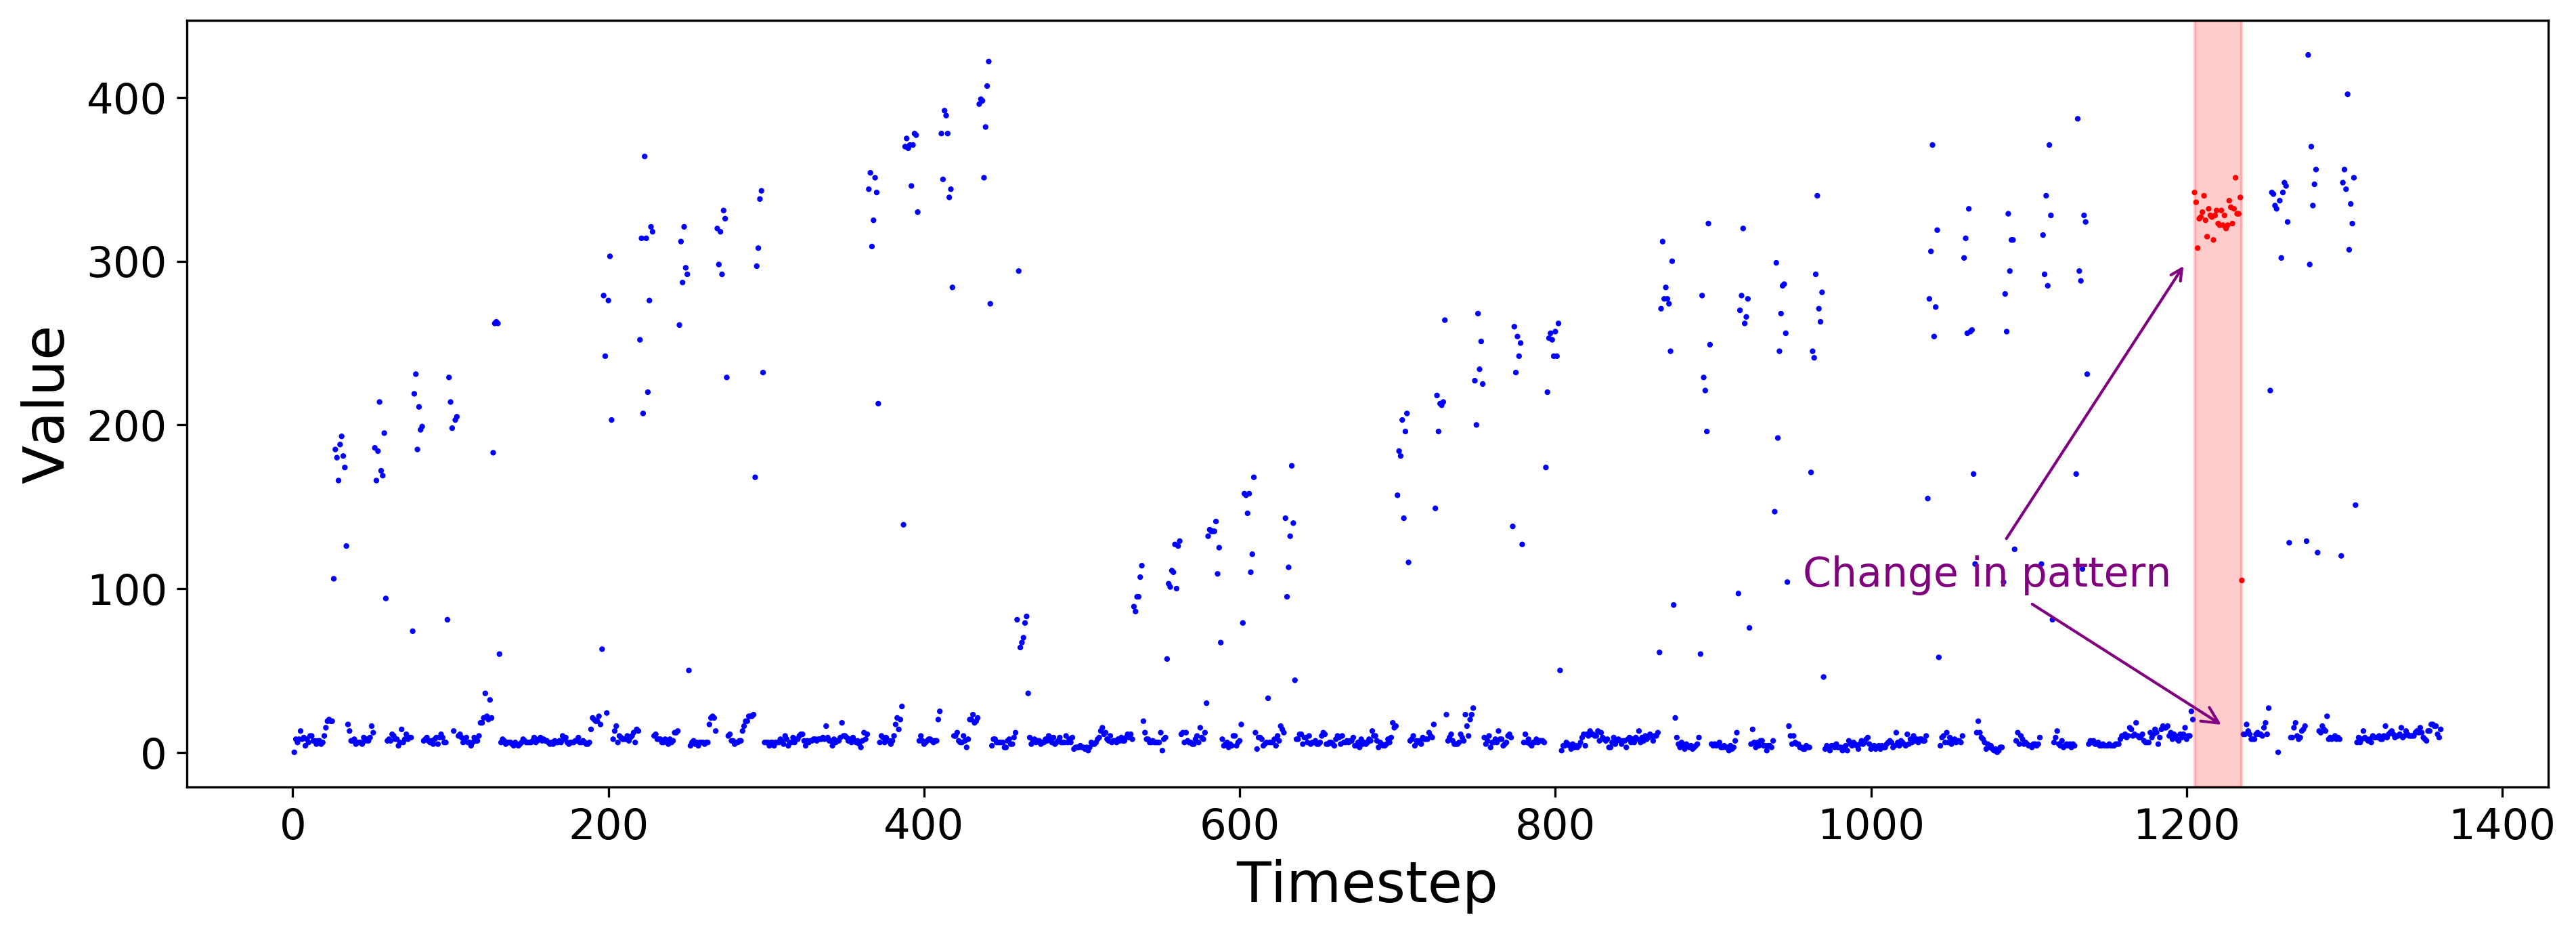

In [7]:
def arrow_explain_context(dat, ax):
    ax.annotate("Change in pattern",
                xy=(1225, 15),
                xytext=(-150, 50),
                textcoords="offset points",
                arrowprops=dict(arrowstyle="->",color="purple"),
                color="purple",
                fontsize="x-large",
    )
    ax.annotate("", xy=(1200, 300), xytext=(-65, -100), textcoords="offset points", arrowprops=dict(arrowstyle="->",color="purple"))


plot_time_series_yahoo_a1(yahoo_df.iloc[:-100], 37, s_power=0, annotate=False, extra_plot=arrow_explain_context)

Important to note:

Contextual - why?
* Alone, the points would be in the nominal range, so would not be anomalous.
* However, the baseline points are not there, and the density of the points in the one range is anomalous. Hence, it is not an anomaly without the CONTEXT given previously.

## Point/Global anomaly

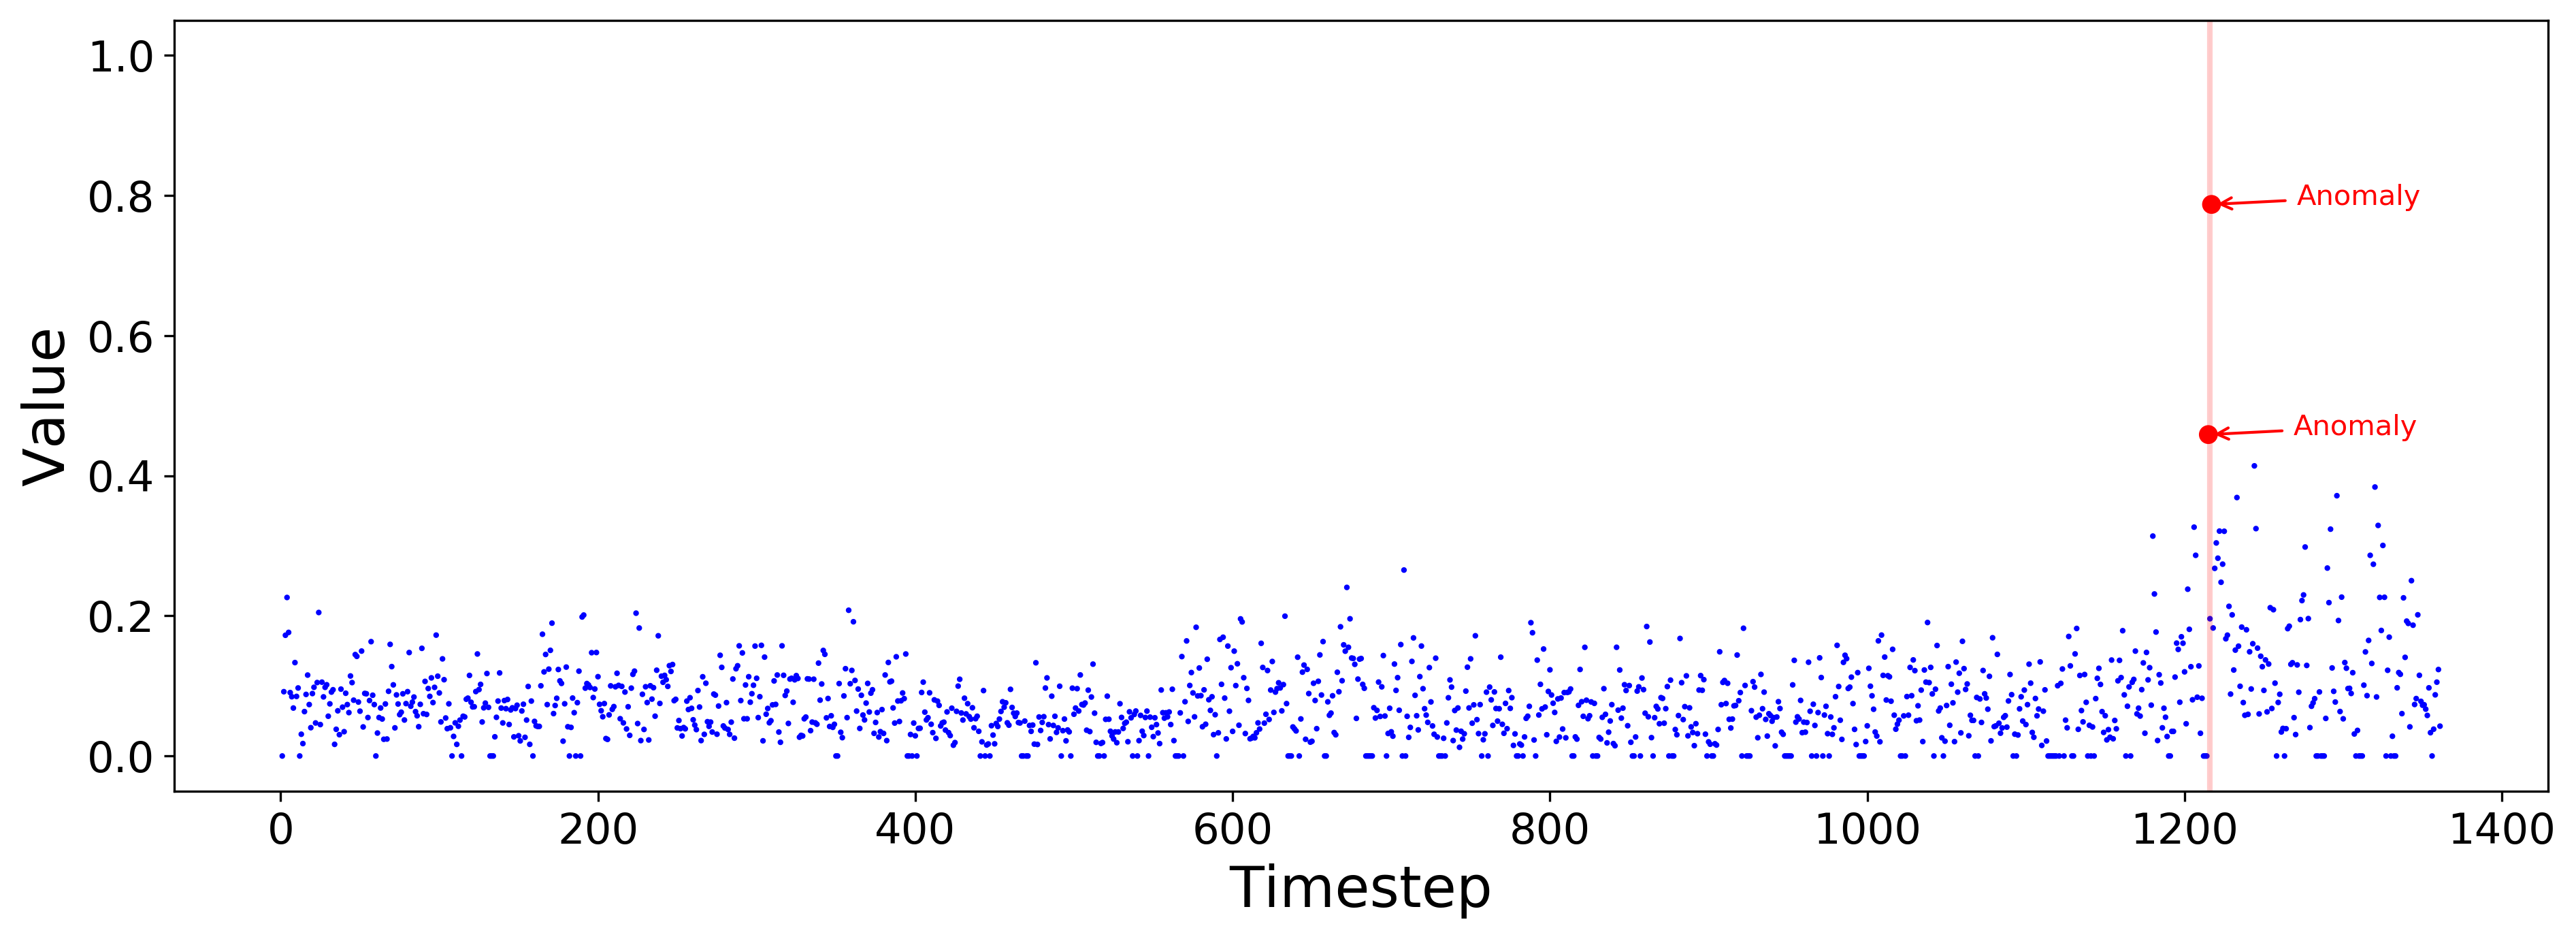

In [8]:
plot_time_series_yahoo_a1(yahoo_df.iloc[:-100], 1)

## Periodic Patterns



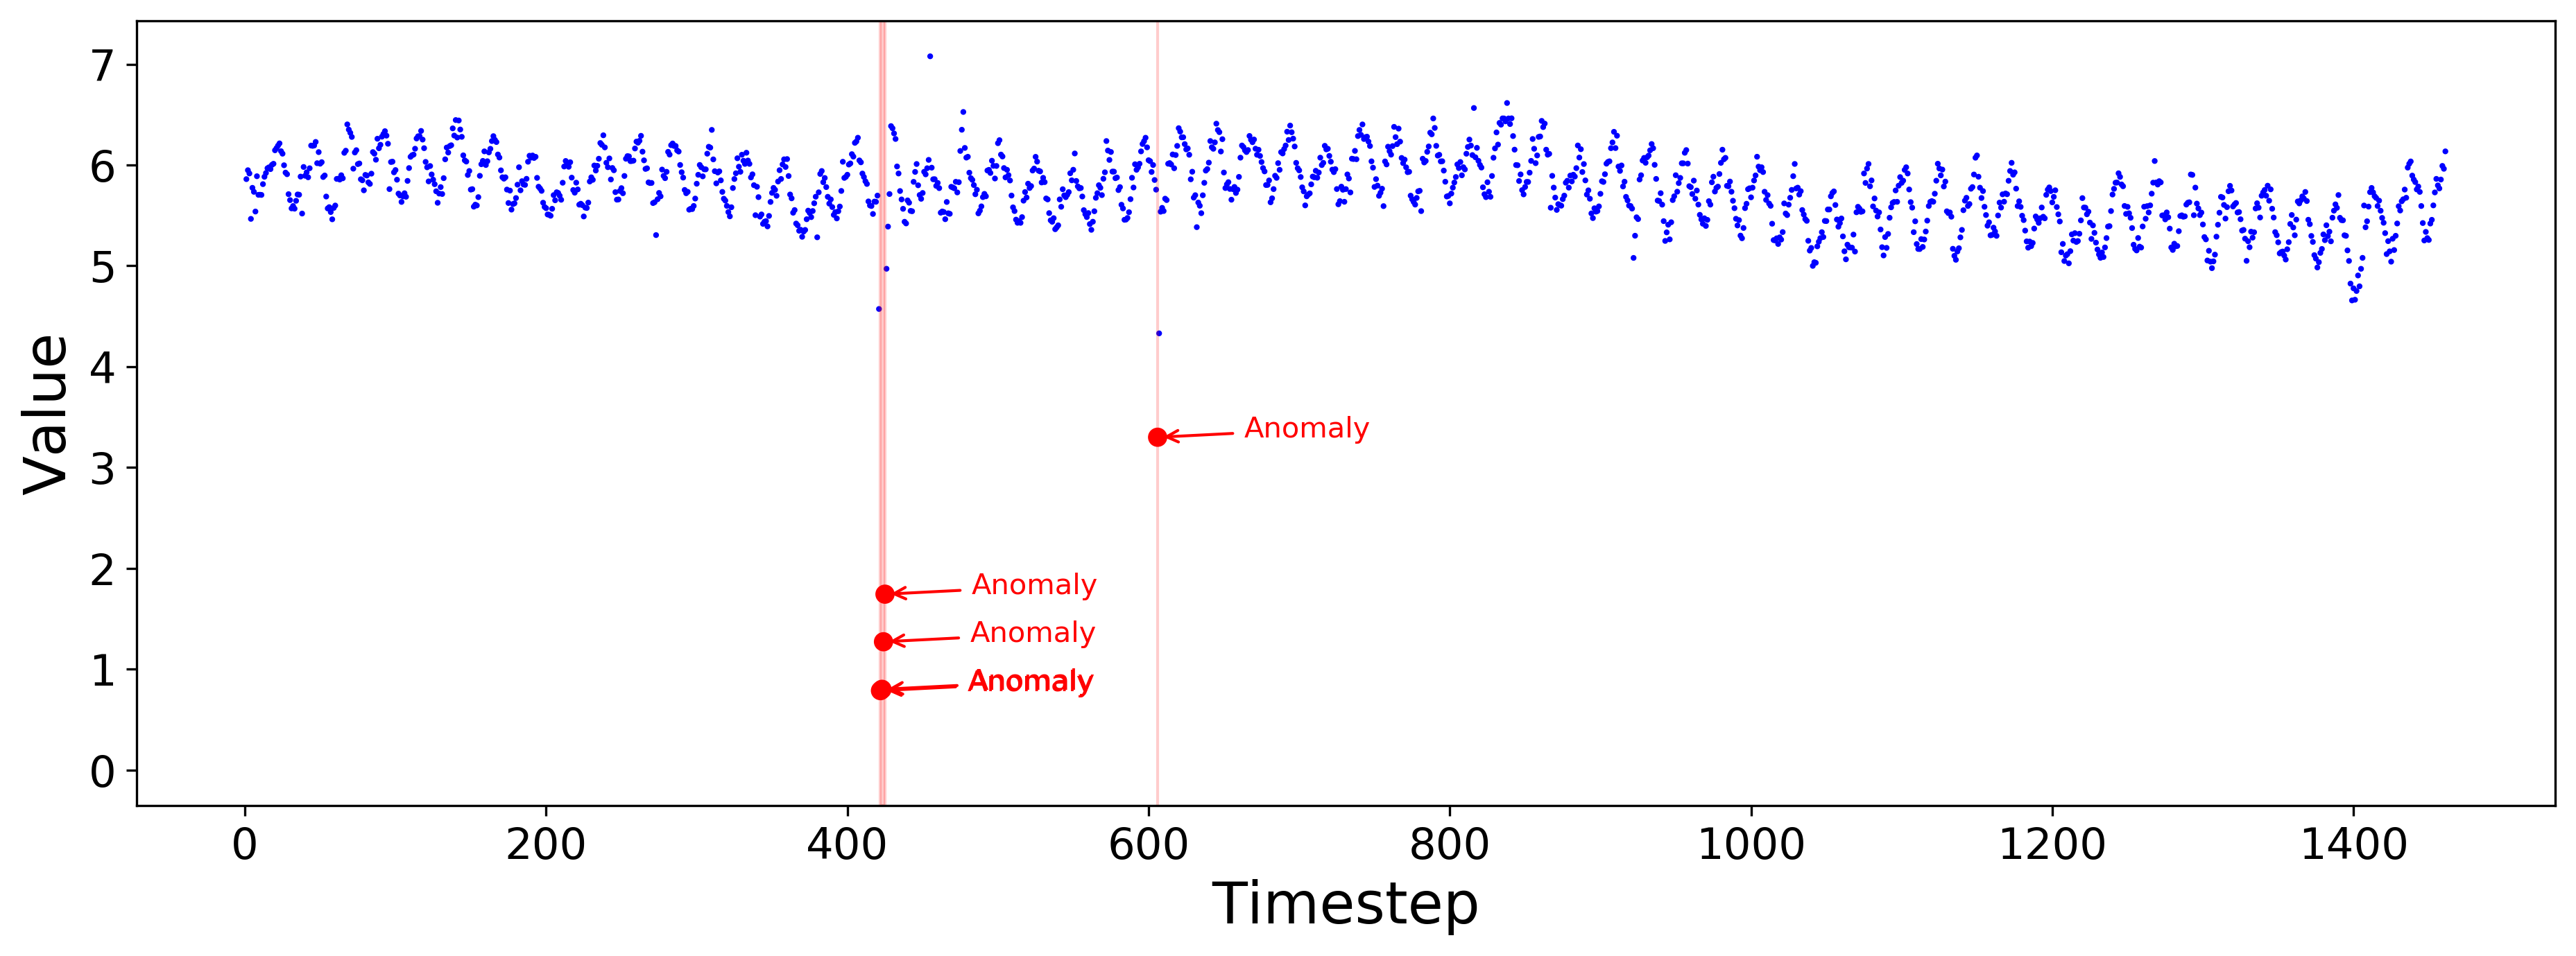

In [9]:
plot_time_series_yahoo_a1(yahoo_df, 36)